<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Prediction-Accuracy-(Comparison-of-all-users-predictions-with-model-trained-on-50-users)" data-toc-modified-id="Prediction-Accuracy-(Comparison-of-all-users-predictions-with-model-trained-on-50-users)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction Accuracy (Comparison of all users predictions with model trained on 50 users)</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive statistics</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Benchmark</a></span></li></ul></li><li><span><a href="#Accuracy-for-all-guesses" data-toc-modified-id="Accuracy-for-all-guesses-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Accuracy for all guesses</a></span><ul class="toc-item"><li><span><a href="#All-guesses-accuracy-(PDF)" data-toc-modified-id="All-guesses-accuracy-(PDF)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>All guesses accuracy (PDF)</a></span></li><li><span><a href="#All-guesses-accuracy-(CDF)" data-toc-modified-id="All-guesses-accuracy-(CDF)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>All guesses accuracy (CDF)</a></span></li><li><span><a href="#All-guesses-accuracy-(Boxplot)" data-toc-modified-id="All-guesses-accuracy-(Boxplot)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>All guesses accuracy (Boxplot)</a></span></li></ul></li><li><span><a href="#Accuracy-by-turn" data-toc-modified-id="Accuracy-by-turn-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Accuracy by turn</a></span><ul class="toc-item"><li><span><a href="#Accuracy-by-turn-(single-user)" data-toc-modified-id="Accuracy-by-turn-(single-user)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Accuracy by turn (single user)</a></span><ul class="toc-item"><li><span><a href="#First-trained-user" data-toc-modified-id="First-trained-user-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>First trained user</a></span></li><li><span><a href="#Mid-point-trained-user" data-toc-modified-id="Mid-point-trained-user-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Mid-point trained user</a></span></li><li><span><a href="#Last-trained-user" data-toc-modified-id="Last-trained-user-2.3.1.3"><span class="toc-item-num">2.3.1.3&nbsp;&nbsp;</span>Last trained user</a></span></li></ul></li><li><span><a href="#Accuracy-by-turn-(mean-of-all-users)" data-toc-modified-id="Accuracy-by-turn-(mean-of-all-users)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Accuracy by turn (mean of all users)</a></span></li></ul></li><li><span><a href="#Accuracy-by-game-stages" data-toc-modified-id="Accuracy-by-game-stages-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Accuracy by game stages</a></span><ul class="toc-item"><li><span><a href="#Opening-accuracy" data-toc-modified-id="Opening-accuracy-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Opening accuracy</a></span></li><li><span><a href="#Middlegame-accuracy" data-toc-modified-id="Middlegame-accuracy-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Middlegame accuracy</a></span></li><li><span><a href="#Endgame-accuracy-(Upper-limit-at-100-turns)" data-toc-modified-id="Endgame-accuracy-(Upper-limit-at-100-turns)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Endgame accuracy (Upper limit at 100 turns)</a></span></li><li><span><a href="#Endgame-accuracy-(No-upper-limit-for-turns)" data-toc-modified-id="Endgame-accuracy-(No-upper-limit-for-turns)-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Endgame accuracy (No upper limit for turns)</a></span></li><li><span><a href="#Game-stages-comparison-(Boxplot)" data-toc-modified-id="Game-stages-comparison-(Boxplot)-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Game stages comparison (Boxplot)</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#OS libs
import os
# File management
from util_functions.file_management import (filter_by, sort_by, split_pred, split_data)
from util_functions.plot_predictions import (get_stats_for_all_predictions,
                                             plot_pdf_multiple_users,
                                             plot_cdf_multiple_users,
                                             plot_boxplot_multiple_users,
                                             get_stats_for_predictions_by_turn,
                                             plot_single_acc_by_turn,
                                             get_mean_of_predictions_by_turn,
                                             get_predictions_by_game_stage_from_turn,
                                             boxplot_game_stages, boxplot_game_stages_w_benchmark)
#Data handling libs
import pandas as pd
# Meta-data
data_folder = os.path.join(os.getcwd(),'dt_chess','datasets')
losses_folder = os.path.join(os.getcwd(),'dt_chess','training_losses')
dt_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_predictions')
benchmark_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_benchmark')
pred_files = os.listdir(dt_pred_folder)
bench_pred_files = os.listdir(benchmark_pred_folder)
model_size = 200
all_acc_stats = ["top_1_accuracy", "engine_choice_2_accuracy", "engine_choice_3_accuracy",
                 "top_2_accuracy", "top_3_accuracy"]
top_k_acc = ["top_1_accuracy", "top_2_accuracy", "top_3_accuracy"]
all_acc_stats_bench = ["benchmark_top_1_accuracy", "benchmark_engine_choice_2_accuracy",
                 "benchmark_engine_choice_3_accuracy", "benchmark_top_2_accuracy",
                 "benchmark_top_3_accuracy"]
top_k_acc_bench = ["benchmark_top_1_accuracy", "benchmark_top_2_accuracy", "benchmark_top_3_accuracy"]
hist_stat='count'

# Prediction Accuracy (Comparison of all users predictions with model trained on 50 users)

## Descriptive statistics

### Model

In [7]:
pred_files_model = filter_by(pred_files, split_pred, num_users=model_size)
pred_files_model = sort_by(pred_files_model, split_pred, [('user_id', True)])
pred_files_model[:5]

['convolutional_200_400_Jiyarkhan_1.csv',
 'convolutional_200_399_Attila-72_1.csv',
 'convolutional_200_398_PaquitodeRivera_1.csv',
 'convolutional_200_397_Lombardi_1.csv',
 'convolutional_200_396_JethrofDCascalla_1.csv']

In [8]:
model_stats_df = get_stats_for_all_predictions(dt_pred_folder, pred_files_model, data_folder)
model_stats_df.index += 1
display(model_stats_df.head().style.format(thousands=','))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [19:29<00:00,  5.85s/it]


In [9]:
model_stats_df.describe()[all_acc_stats]

top_1_accuracy  engine_choice_2_accuracy  engine_choice_3_accuracy  \
count      200.000000                200.000000                200.000000   
mean        28.039720                 14.356019                  9.233832   
std          1.545218                  0.448320                  0.207415   
min         24.245488                 13.216363                  8.734038   
25%         27.137953                 14.059196                  9.087084   
50%         28.054308                 14.374467                  9.212403   
75%         28.982343                 14.586543                  9.387536   
max         37.029199                 15.595386                  9.841841   

       top_2_accuracy  top_3_accuracy  
count      200.000000      200.000000  
mean        42.395740       51.629571  
std          1.926799        2.038702  
min         37.461851       46.386004  
25%         41.163747       50.274176  
50%         42.447050       51.711484  
75%         43.559064       52.811428  
max         52.509353       61.497369

In [10]:
model_stats_df[model_stats_df['top_1_accuracy'] > 28]

total     fp    tp1    tp2    tp3     tn1    tn2    tn3  top_1_accuracy  \
1    124604   9471  35481  17853  11419   89123  71270  59851       28.475009   
4    125630   9564  37716  18363  11840   87914  69551  57711       30.021492   
5    120083  10571  36413  18111  11105   83670  65559  54454       30.323193   
6    125178  10217  35299  18182  11766   89879  71697  59931       28.199045   
9    108769   7303  32289  15861  10213   76480  60619  50406       29.685848   
..      ...    ...    ...    ...    ...     ...    ...    ...             ...   
194  174638  16639  54408  26937  17060  120230  93293  76233       31.154732   
195  158320  12364  46955  24004  15168  111365  87361  72193       29.658287   
198  122845  10737  36901  17929  11306   85944  68015  56709       30.038667   
199  173904  15026  53993  27121  17100  119911  92790  75690       31.047589   
200  126168   5892  46719  19531  11340   79449  59918  48578       37.029199   

     engine_choice_2_accuracy  engine_choice_3_accuracy  top_2_accuracy  \
1                   14.327790                  9.164232       42.802799   
4                   14.616732                  9.424501       44.638223   
5                   15.082068                  9.247770       45.405261   
6                   14.524917                  9.399415       42.723961   
9                   14.582280                  9.389624       44.268128   
..                        ...                       ...             ...   
194                 15.424478                  9.768779       46.579210   
195                 15.161698                  9.580596       44.819985   
198                 14.594815                  9.203468       44.633481   
199                 15.595386                  9.833011       46.642975   
200                 15.480153                  8.988016       52.509353   

     top_3_accuracy  
1         51.967032  
4         54.062724  
5         54.653032  
6         52.123376  
9         53.657752  
..              ...  
194       56.347988  
195       54.400581  
198       53.836949  
199       56.475987  
200       61.497369  

[101 rows x 13 columns]

### Benchmark

In [12]:
bench_pred_files_model = sort_by(bench_pred_files, split_data, [('user_id', True)])[:model_size]
bench_stats_df = get_stats_for_all_predictions(benchmark_pred_folder, bench_pred_files_model,
                                               data_folder, split_type=split_data)
bench_stats_df.index += 1
display(bench_stats_df.head().style.format(thousands=','))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [18:13<00:00,  5.47s/it]


In [13]:
for i in range(len(all_acc_stats)):
    bench_stats_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]}, inplace=True)
bench_stats_df.describe()[all_acc_stats_bench]

benchmark_top_1_accuracy  benchmark_engine_choice_2_accuracy  \
count                200.000000                          200.000000   
mean                  49.909894                           18.955011   
std                    2.375577                            0.329559   
min                   37.132254                           17.316881   
25%                   48.835399                           18.800256   
50%                   50.211507                           19.005873   
75%                   51.429813                           19.176236   
max                   54.483851                           19.545770   

       benchmark_engine_choice_3_accuracy  benchmark_top_2_accuracy  \
count                          200.000000                200.000000   
mean                             9.709314                 68.864905   
std                              0.208670                  2.606896   
min                              9.096280                 54.449135   
25%                              9.571935                 67.737493   
50%                              9.702359                 69.275174   
75%                              9.830079                 70.622260   
max                             10.279087                 73.499672   

       benchmark_top_3_accuracy  
count                200.000000  
mean                  78.574218  
std                    2.484294  
min                   64.435682  
25%                   77.463197  
50%                   79.033796  
75%                   80.221030  
max                   82.638330

## Accuracy for all guesses

### All guesses accuracy (PDF)

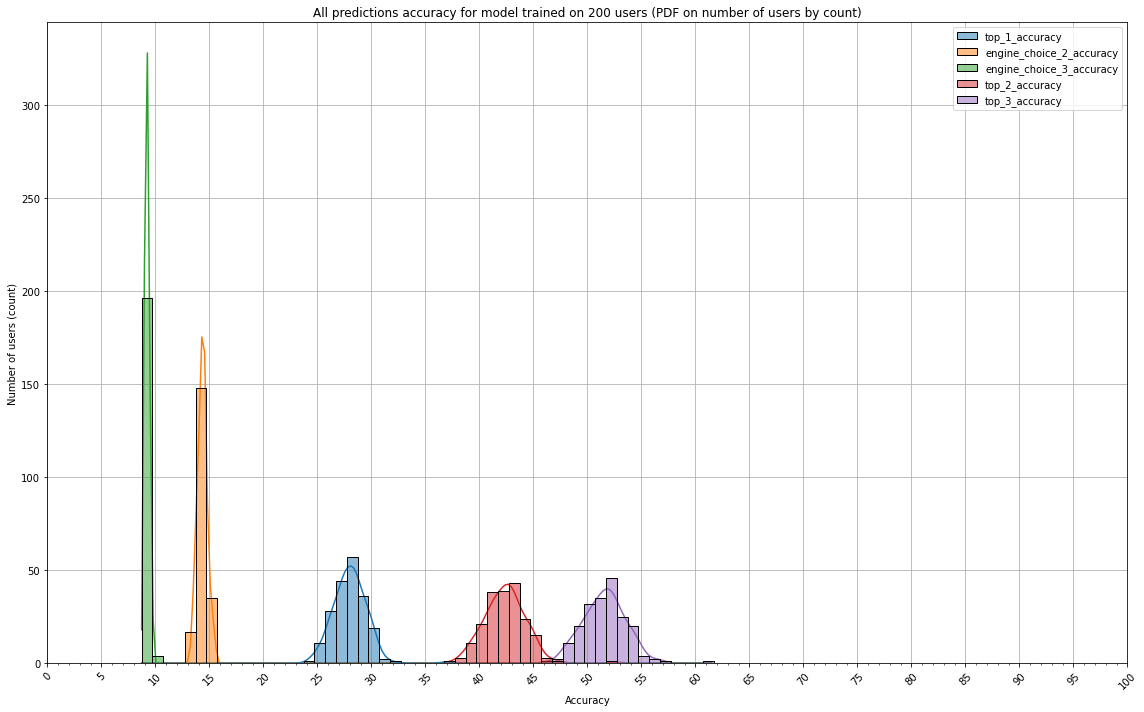

In [14]:
%matplotlib inline
plot_pdf_multiple_users(model_stats_df, all_acc_stats, hist_stat=hist_stat)

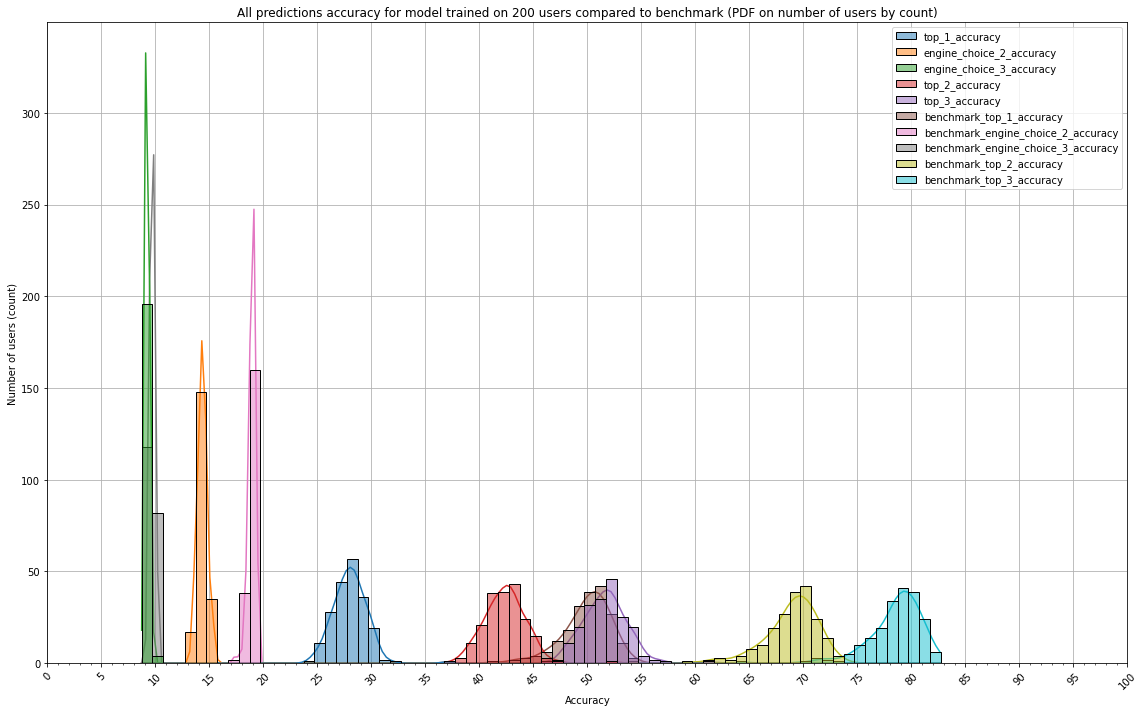

In [15]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        all_acc_stats + all_acc_stats_bench, hist_stat=hist_stat,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark "
                               f"(PDF on number of users by {hist_stat})"))

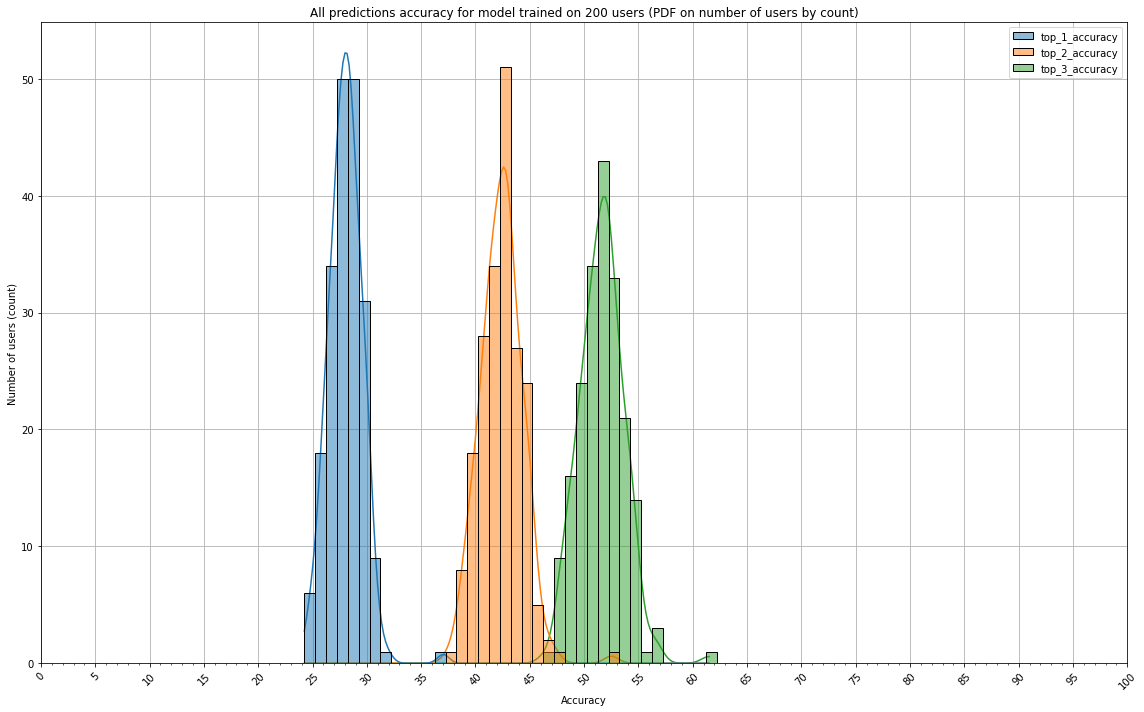

In [16]:
%matplotlib inline
plot_pdf_multiple_users(model_stats_df, top_k_acc, hist_stat=hist_stat)

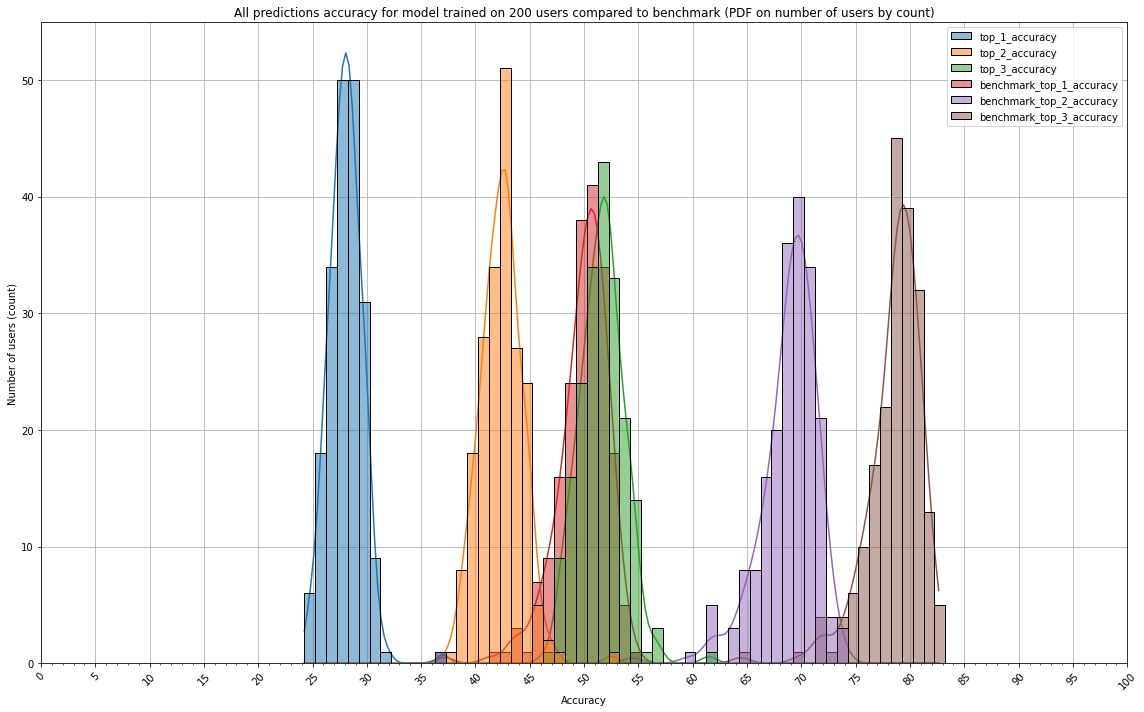

In [17]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        top_k_acc + top_k_acc_bench, hist_stat=hist_stat,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark "
                               f"(PDF on number of users by {hist_stat})"))

### All guesses accuracy (CDF)

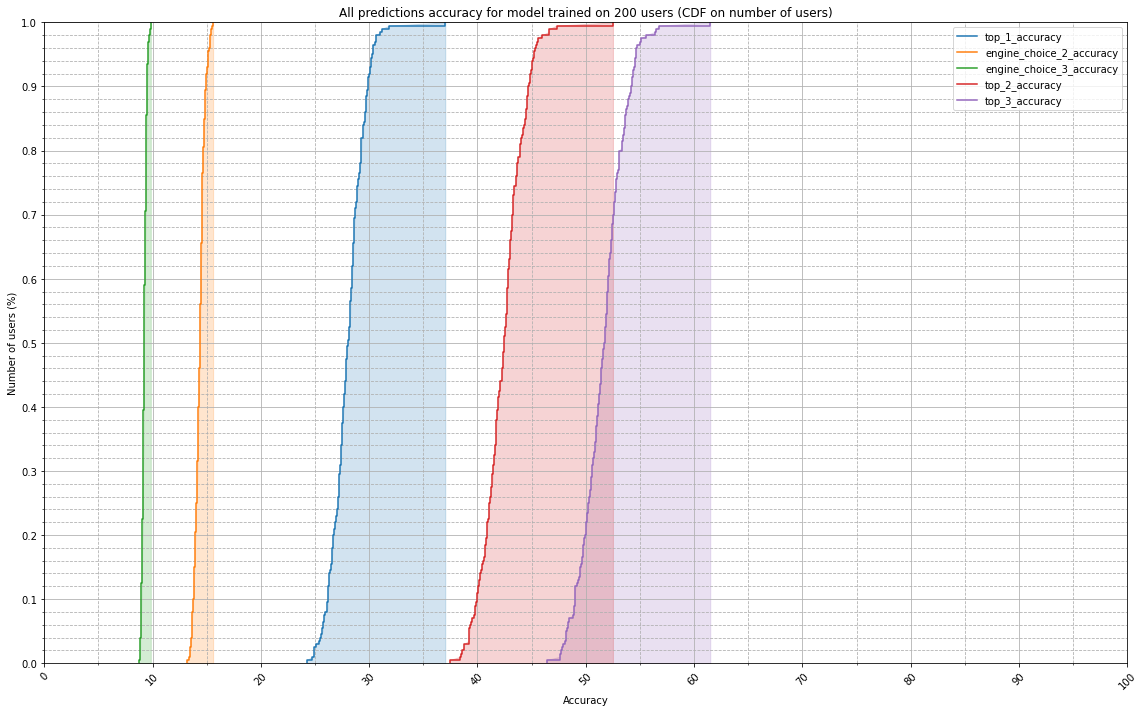

In [18]:
%matplotlib inline
plot_cdf_multiple_users(model_stats_df, all_acc_stats)

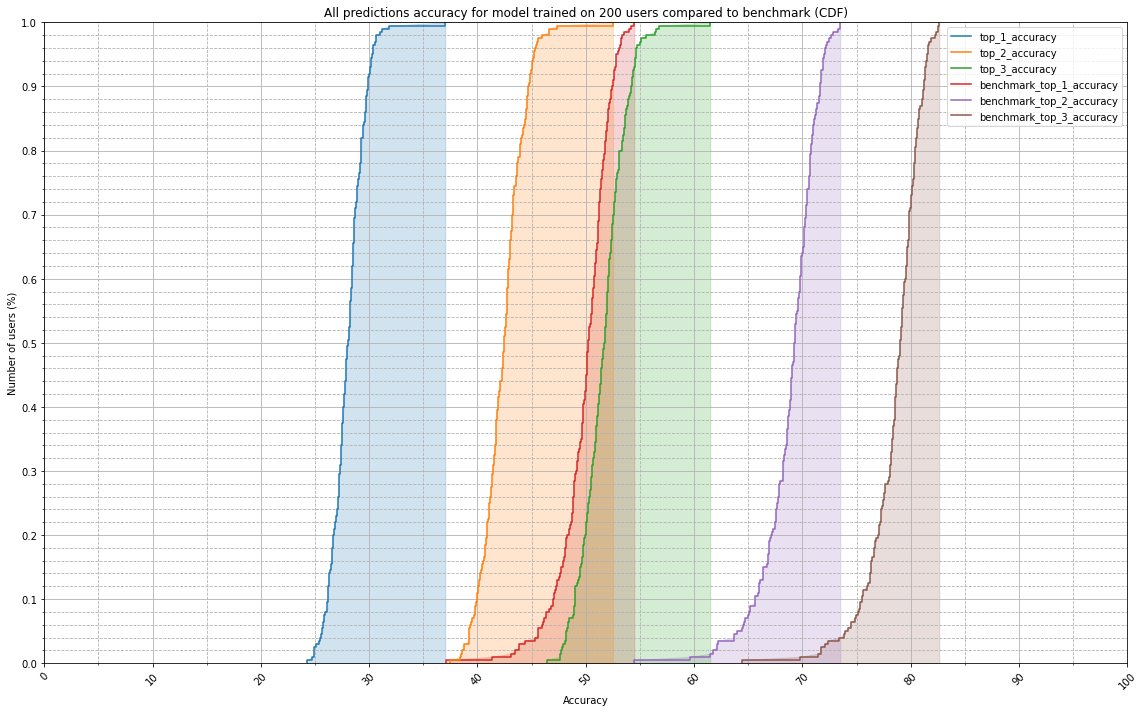

In [19]:
%matplotlib inline
plot_cdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        top_k_acc + top_k_acc_bench,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark (CDF)"))

### All guesses accuracy (Boxplot)

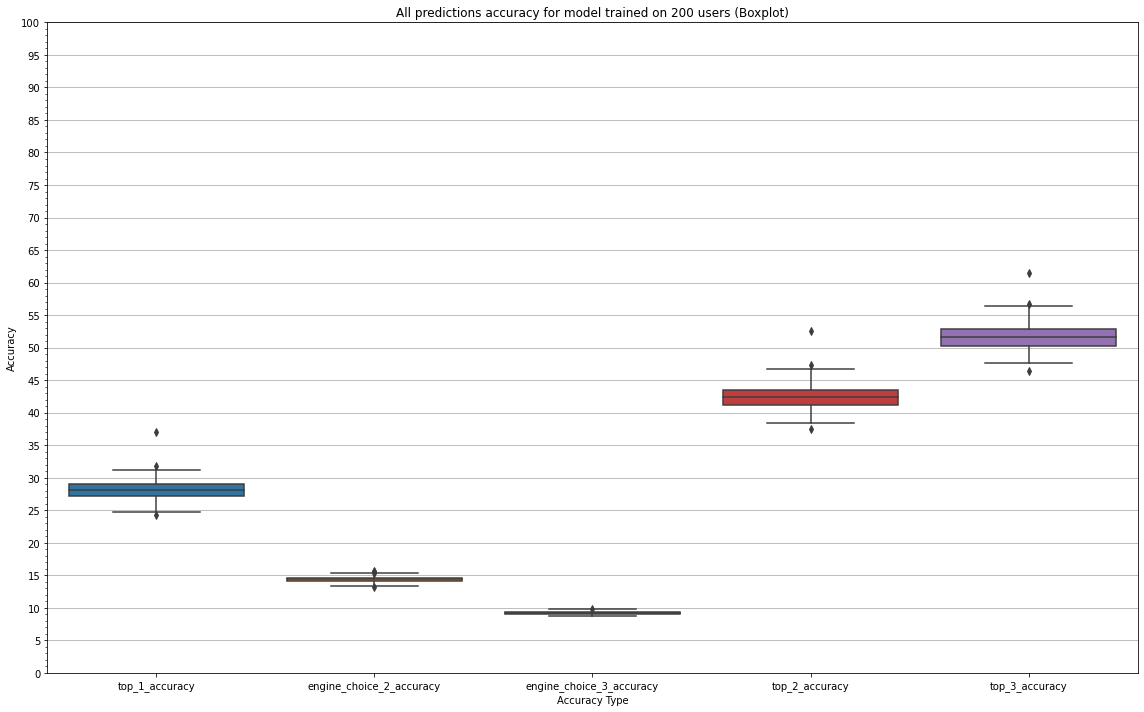

In [20]:
%matplotlib inline
plot_boxplot_multiple_users(model_stats_df, all_acc_stats)

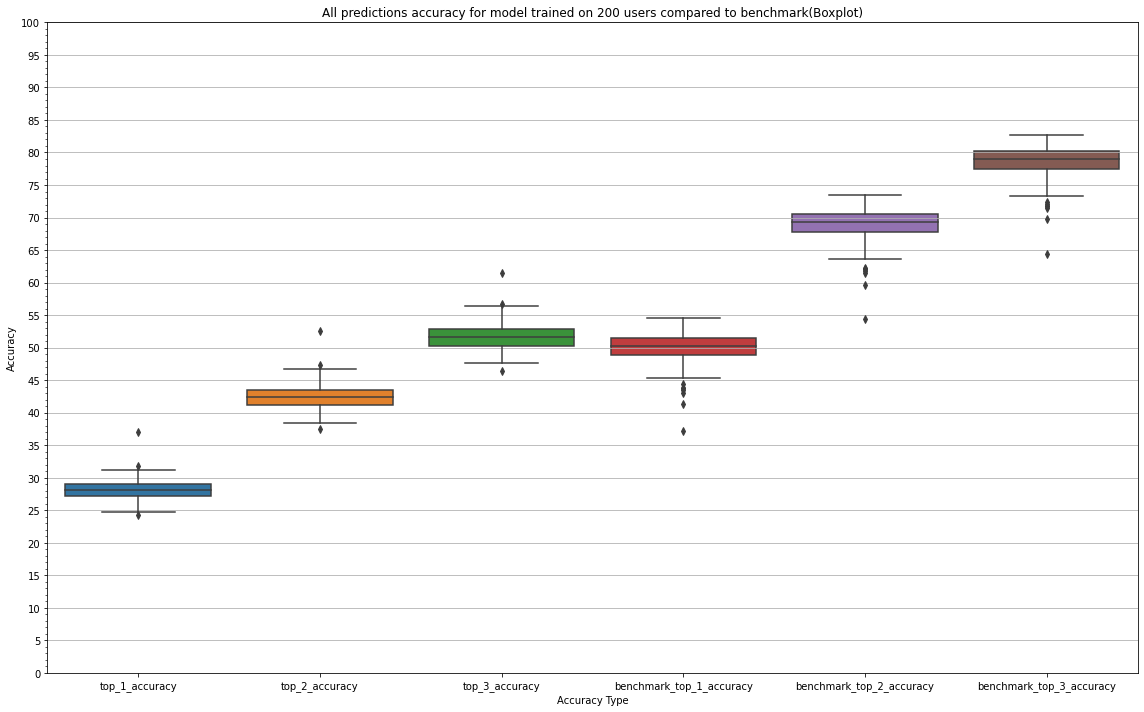

In [21]:
%matplotlib inline
plot_boxplot_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                            top_k_acc + top_k_acc_bench,
                            title=("All predictions accuracy for model trained on "
                                   f"{len(model_stats_df)} users compared to benchmark(Boxplot)"))

## Accuracy by turn

### Accuracy by turn (single user)

In [22]:
model_turn_df = get_stats_for_predictions_by_turn(dt_pred_folder, pred_files_model, data_folder)
# display(model_turn_df.head())

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [18:28<00:00,  5.54s/it]


In [23]:
bench_turn_df = get_stats_for_predictions_by_turn(benchmark_pred_folder, bench_pred_files_model,
                                                  data_folder, split_type=split_data)
# display(bench_turn_df.head())

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [15:40<00:00,  4.70s/it]


#### First trained user

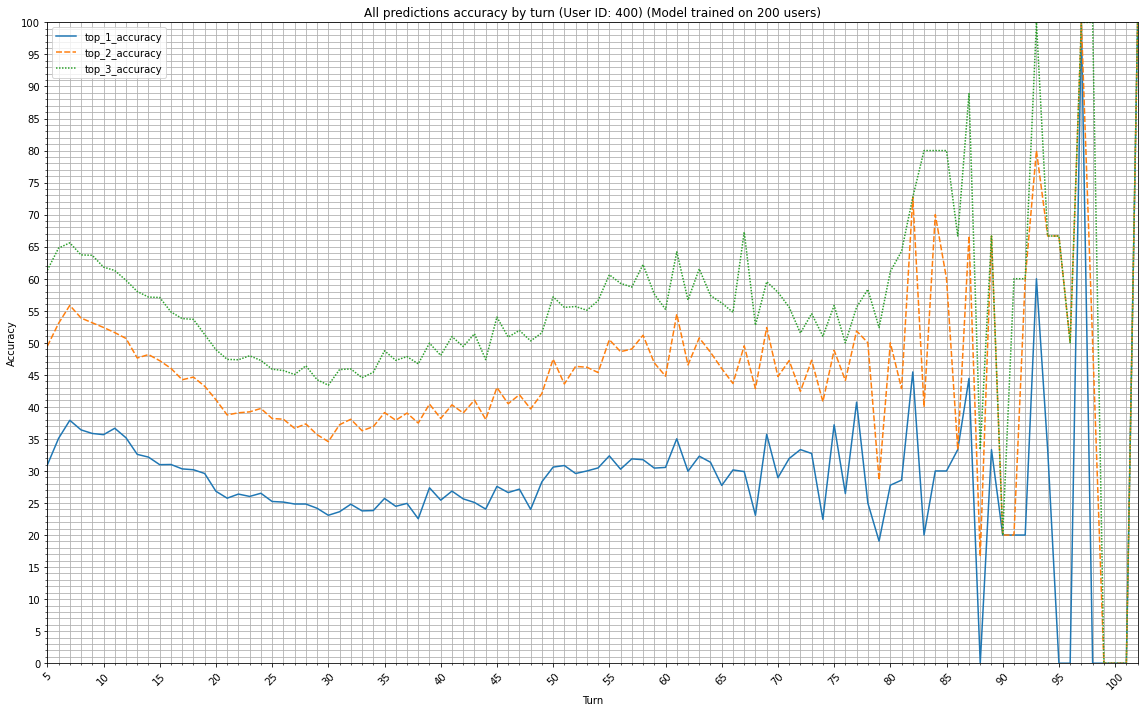

In [62]:
i, _ = (0, 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

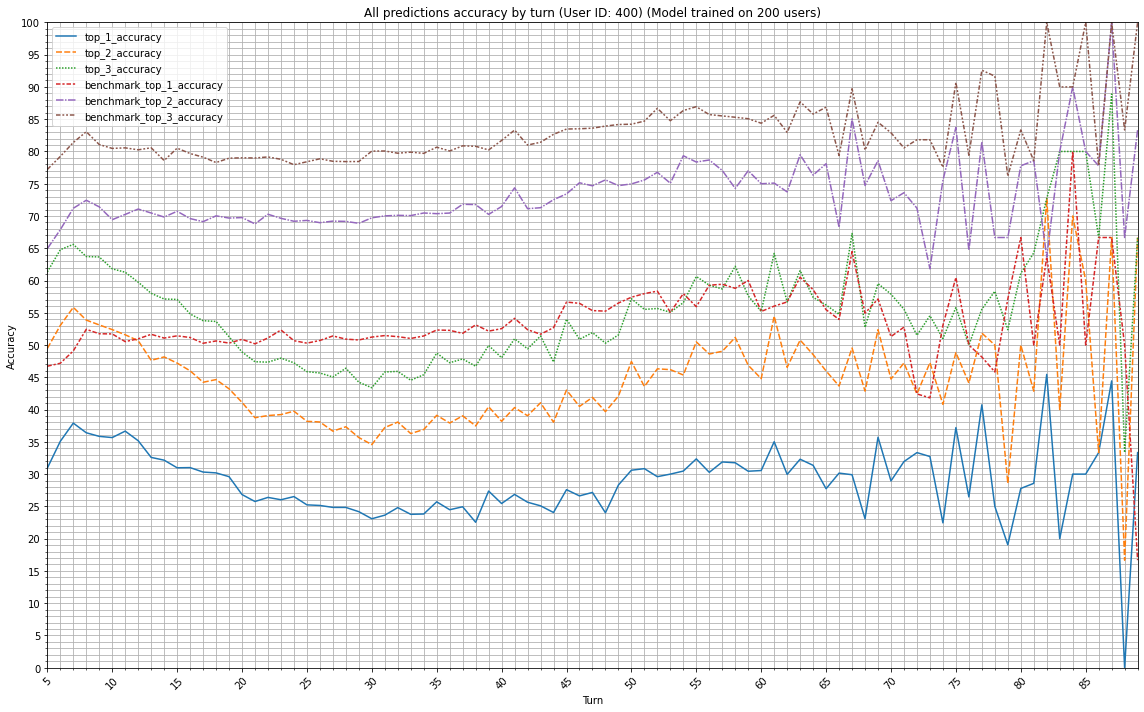

In [63]:
i, turn_cap = (0, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

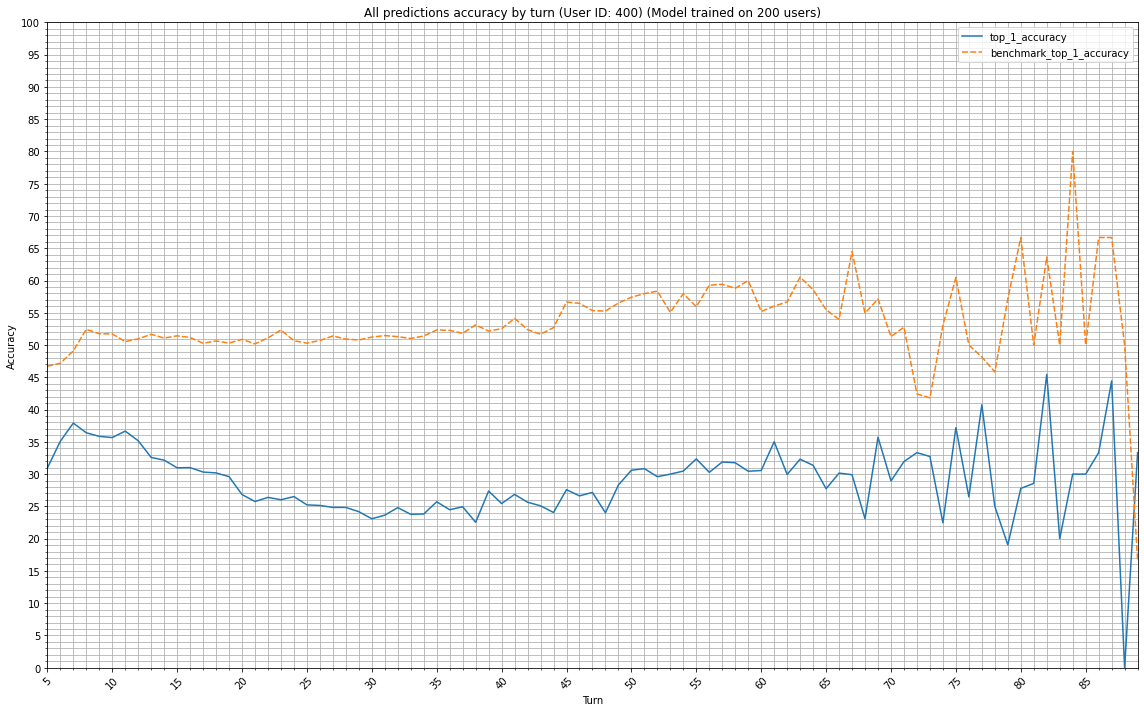

In [64]:
i, turn_cap = (0, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

#### Mid-point trained user

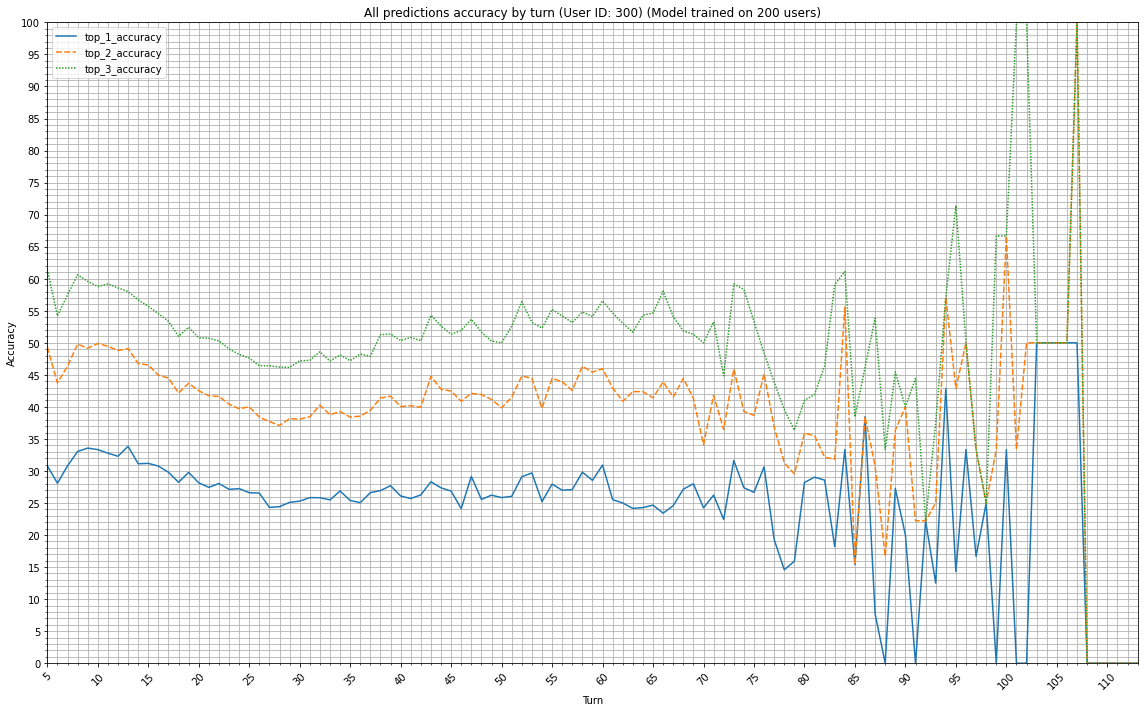

In [65]:
i, _ = (int(len(pred_files_model)/2), 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

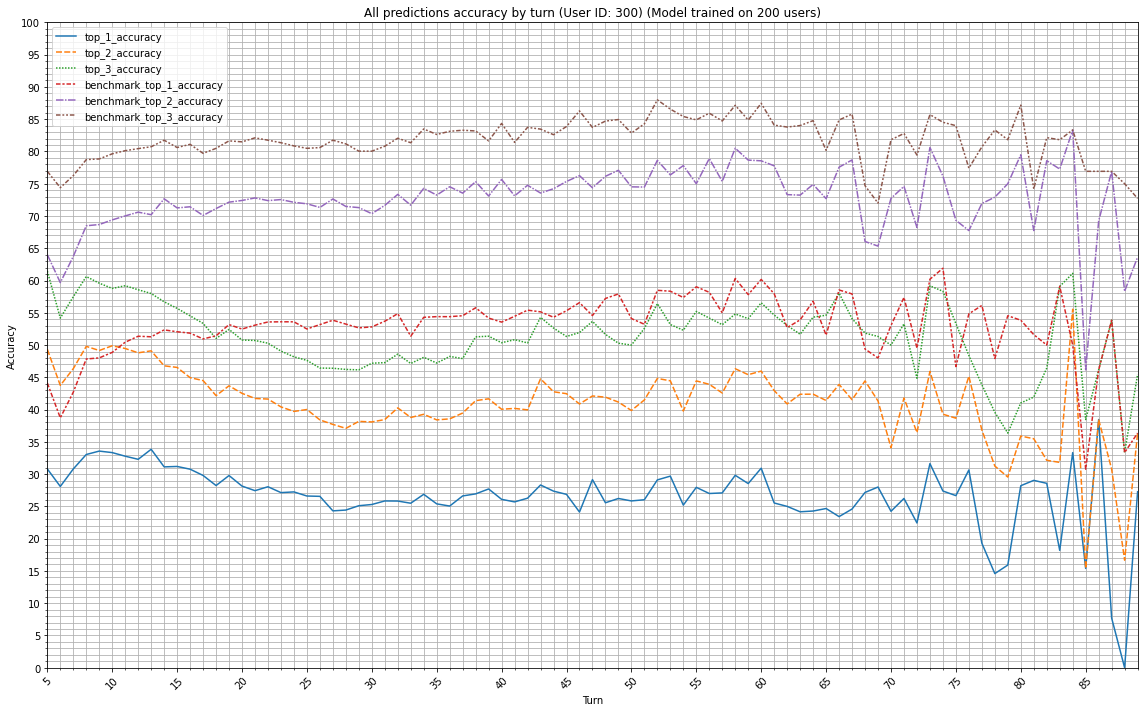

In [66]:
i, turn_cap = (int(len(pred_files_model)/2), 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

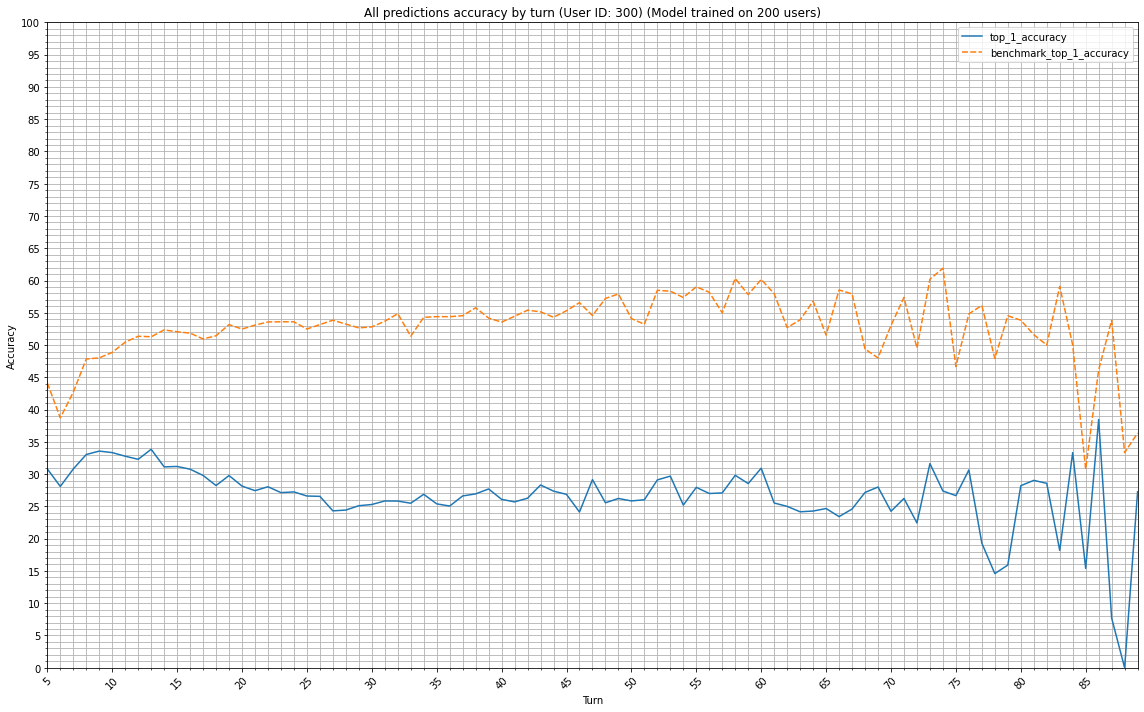

In [67]:
i, turn_cap = (int(len(pred_files_model)/2), 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

#### Last trained user

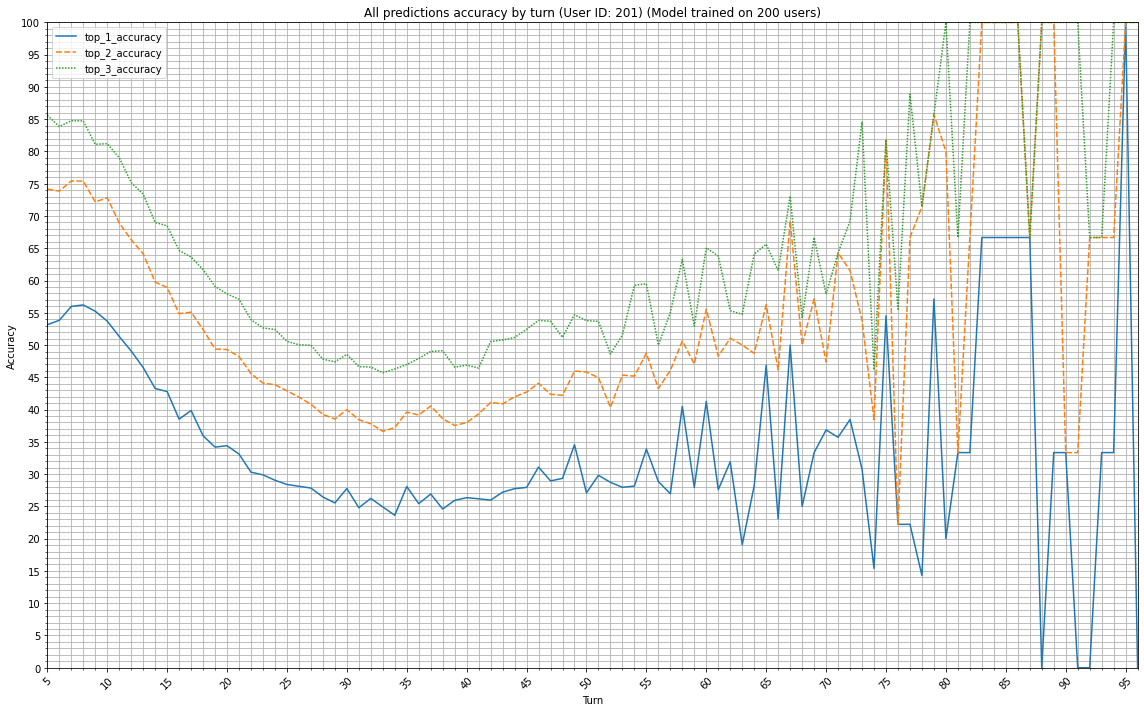

In [68]:
i, _ = (-1, 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

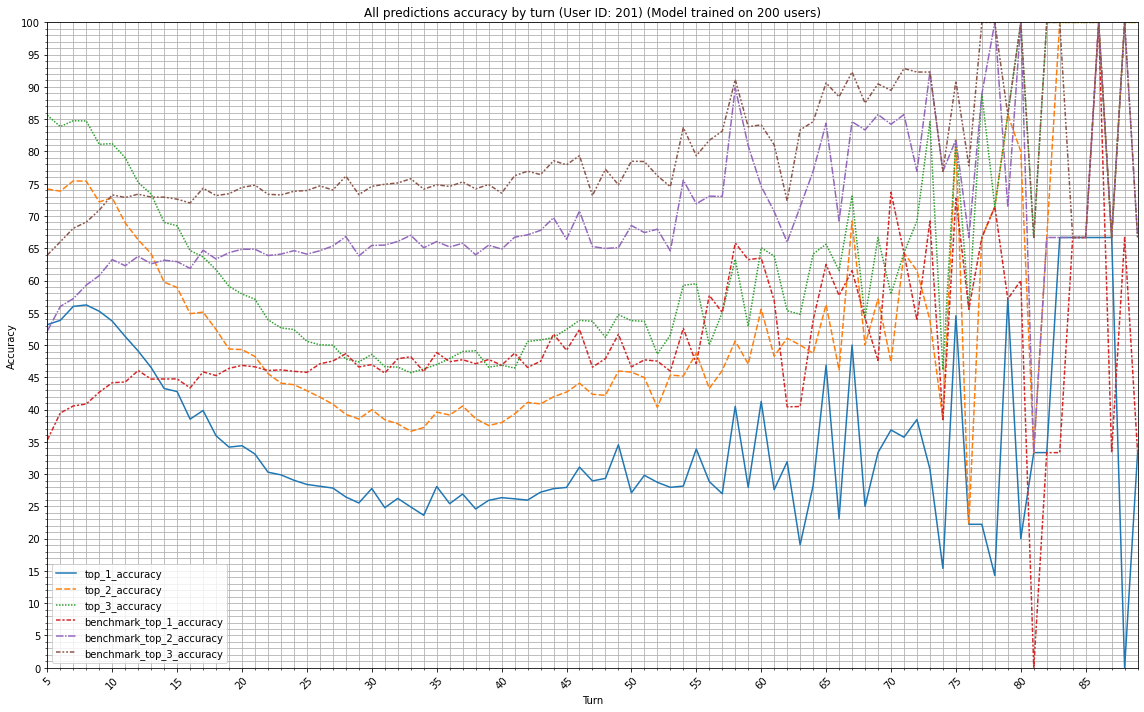

In [69]:
i, turn_cap = (-1, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

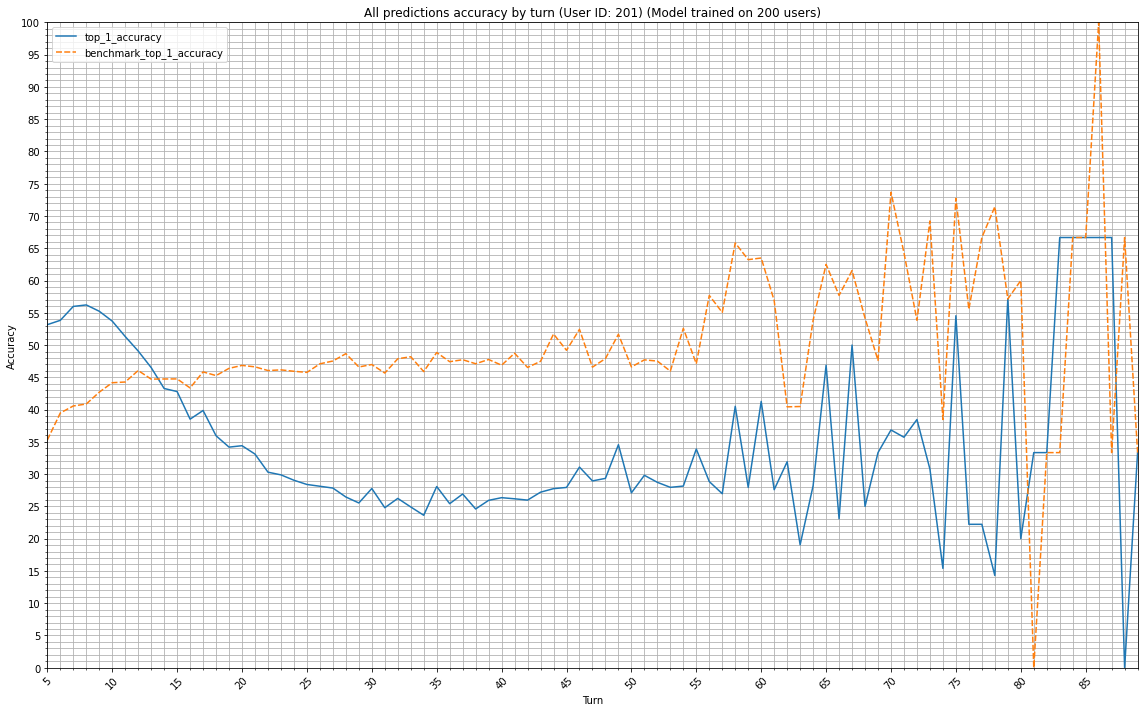

In [70]:
i, turn_cap = (-1, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

### Accuracy by turn (mean of all users)

In [33]:
model_turn_all_df = get_mean_of_predictions_by_turn(model_turn_df, all_acc_stats)
bench_turn_all_df = get_mean_of_predictions_by_turn(bench_turn_df, all_acc_stats)
for i in range(len(all_acc_stats)):
    bench_turn_all_df = bench_turn_all_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
# display(bench_turn_all_df.head())

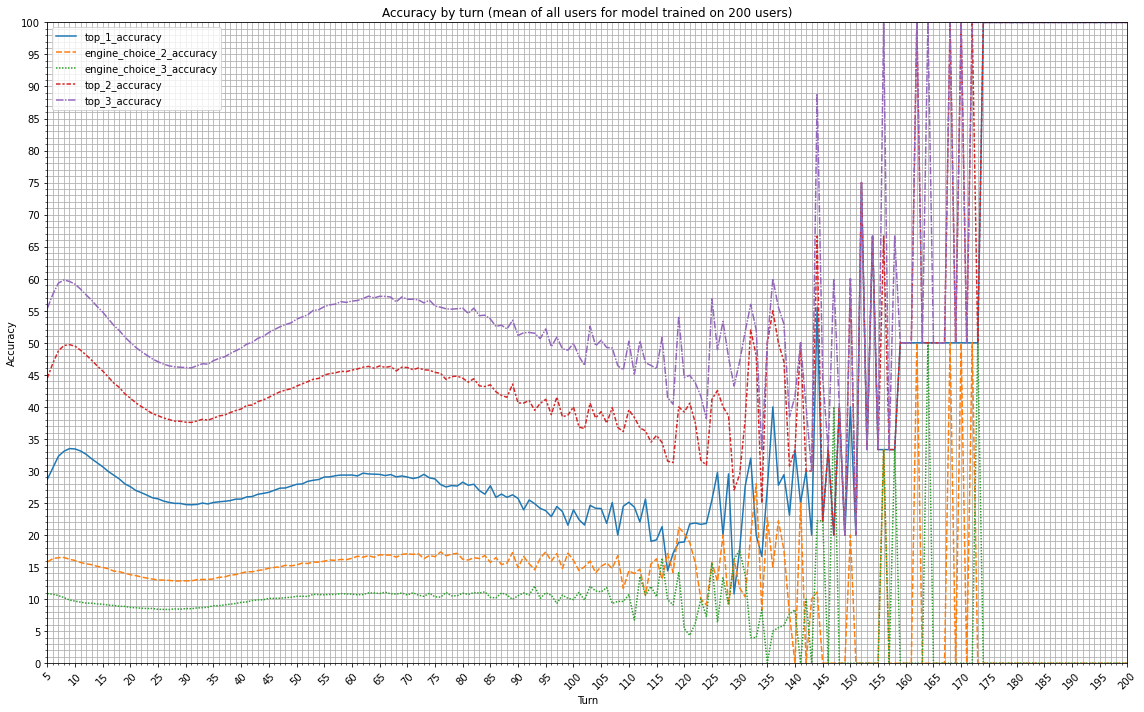

In [34]:
plot_single_acc_by_turn(model_turn_all_df[all_acc_stats],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

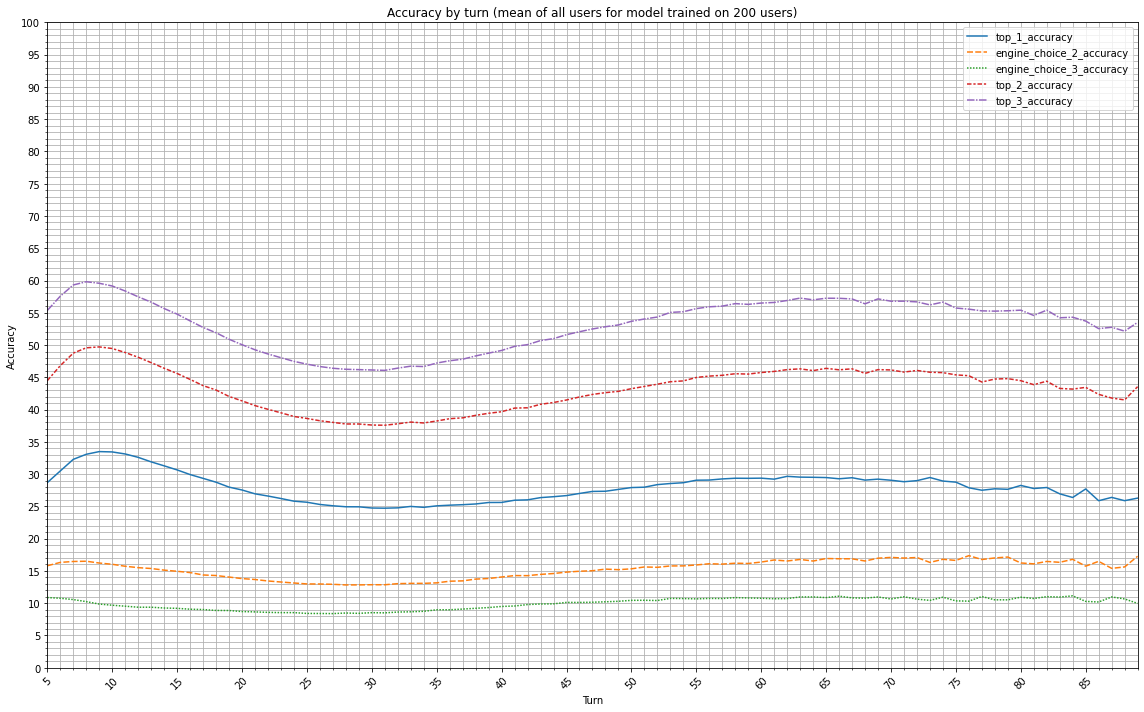

In [35]:
plot_single_acc_by_turn(model_turn_all_df[all_acc_stats][:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

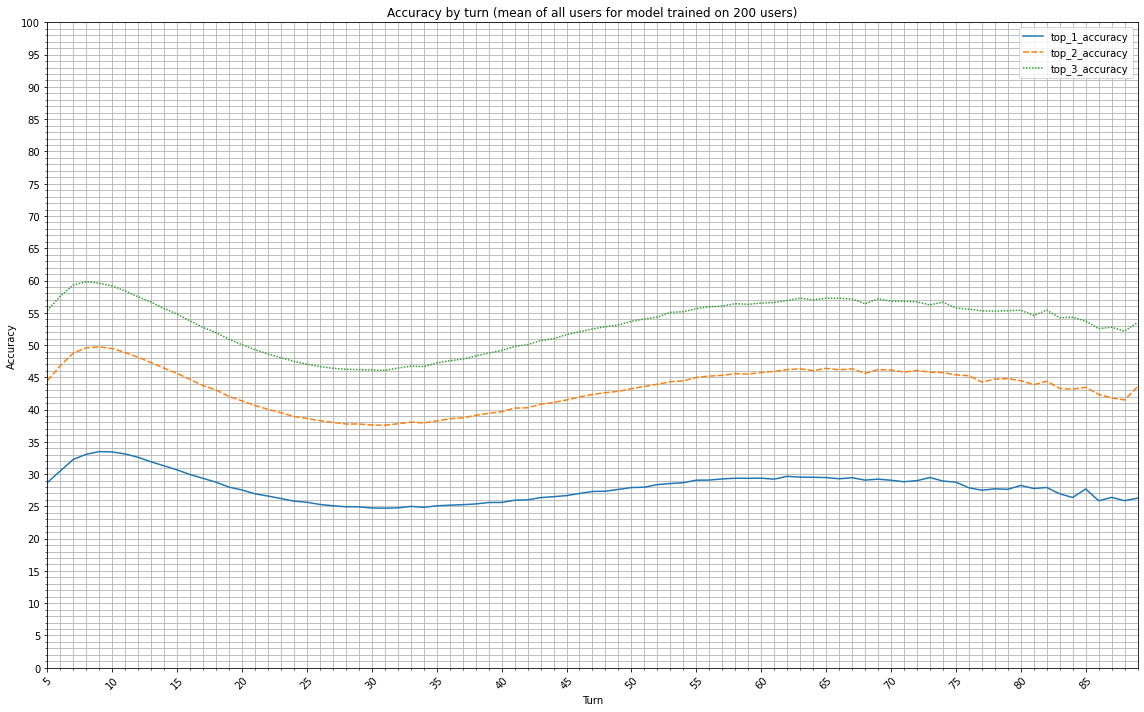

In [36]:
plot_single_acc_by_turn(model_turn_all_df[top_k_acc][:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

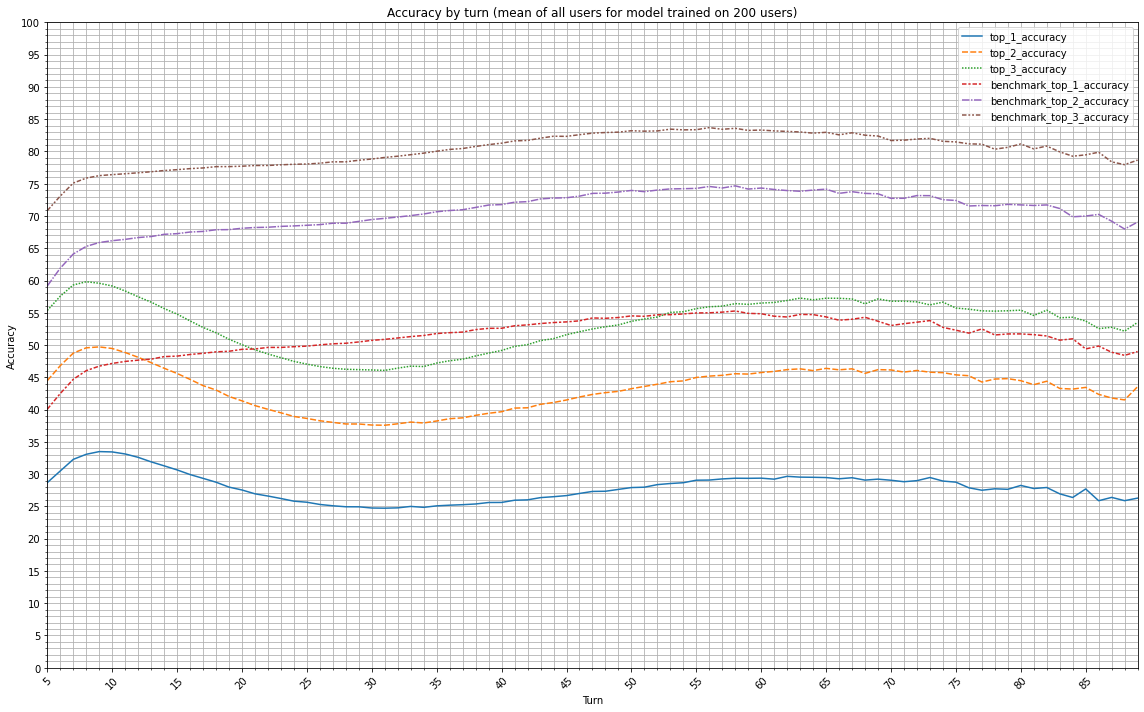

In [37]:
plot_single_acc_by_turn(pd.concat([model_turn_all_df[top_k_acc],
                                   bench_turn_all_df[top_k_acc_bench]], axis=1)[:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

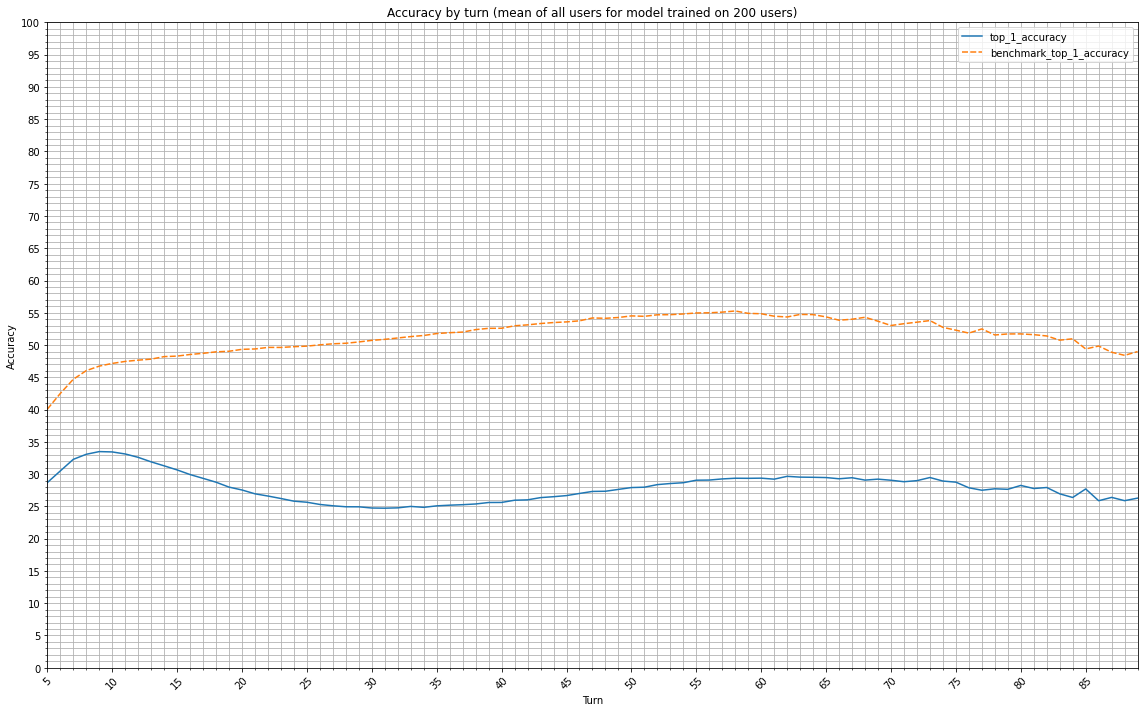

In [38]:
plot_single_acc_by_turn(pd.concat([model_turn_all_df[top_k_acc[0]],
                                   bench_turn_all_df[top_k_acc_bench[0]]], axis=1)[:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

## Accuracy by game stages

In [39]:
idx_separate = [15, 40, 100]
df_opening, df_middle, df_end = get_predictions_by_game_stage_from_turn(model_turn_df, idx_separate, all_acc_stats)
_, _, df_end_uncapped = get_predictions_by_game_stage_from_turn(model_turn_df, idx_separate[:2], all_acc_stats)
df_opening_bench, df_middle_bench, df_end_bench = get_predictions_by_game_stage_from_turn(bench_turn_df,
                                                                                          idx_separate,
                                                                                          all_acc_stats)
_, _, df_end_uncapped_bench = get_predictions_by_game_stage_from_turn(bench_turn_df, idx_separate[:2],
                                                                      all_acc_stats)
for i in range(len(all_acc_stats)):
    df_opening_bench = df_opening_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_middle_bench = df_middle_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_end_bench = df_end_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_end_uncapped_bench = df_end_uncapped_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})

### Opening accuracy

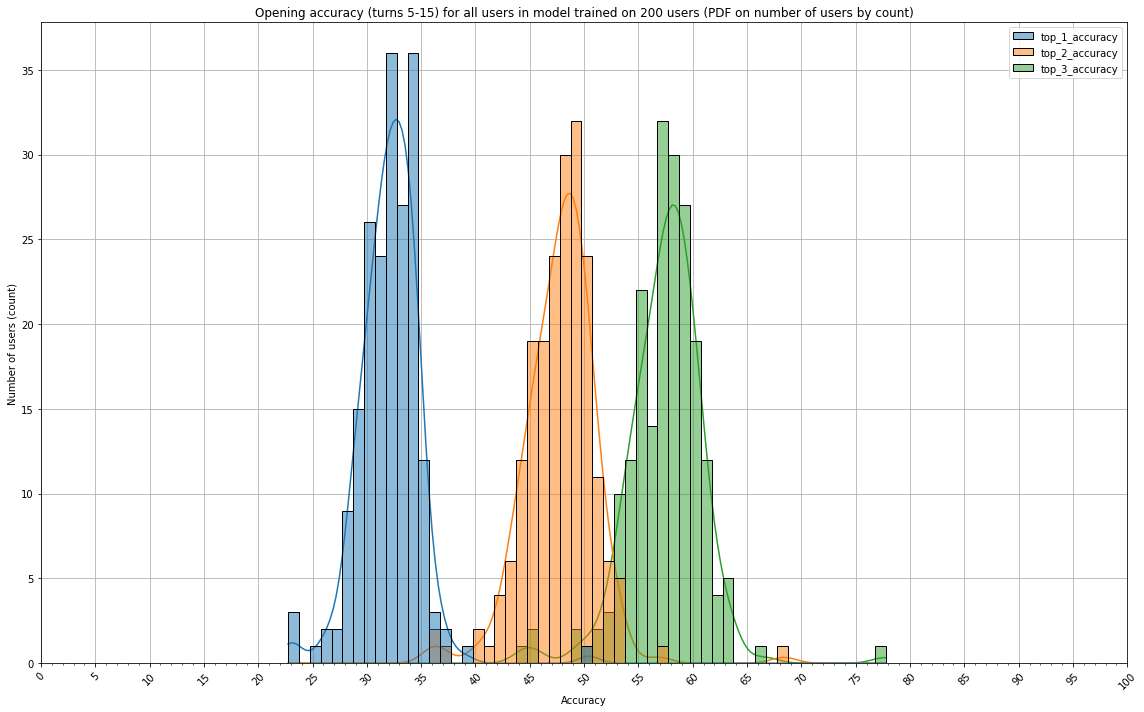

In [40]:
%matplotlib inline
plot_pdf_multiple_users(df_opening, top_k_acc, hist_stat=hist_stat,
                        title=(f"Opening accuracy (turns 5-{idx_separate[0]}) for all users "
                               f"in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

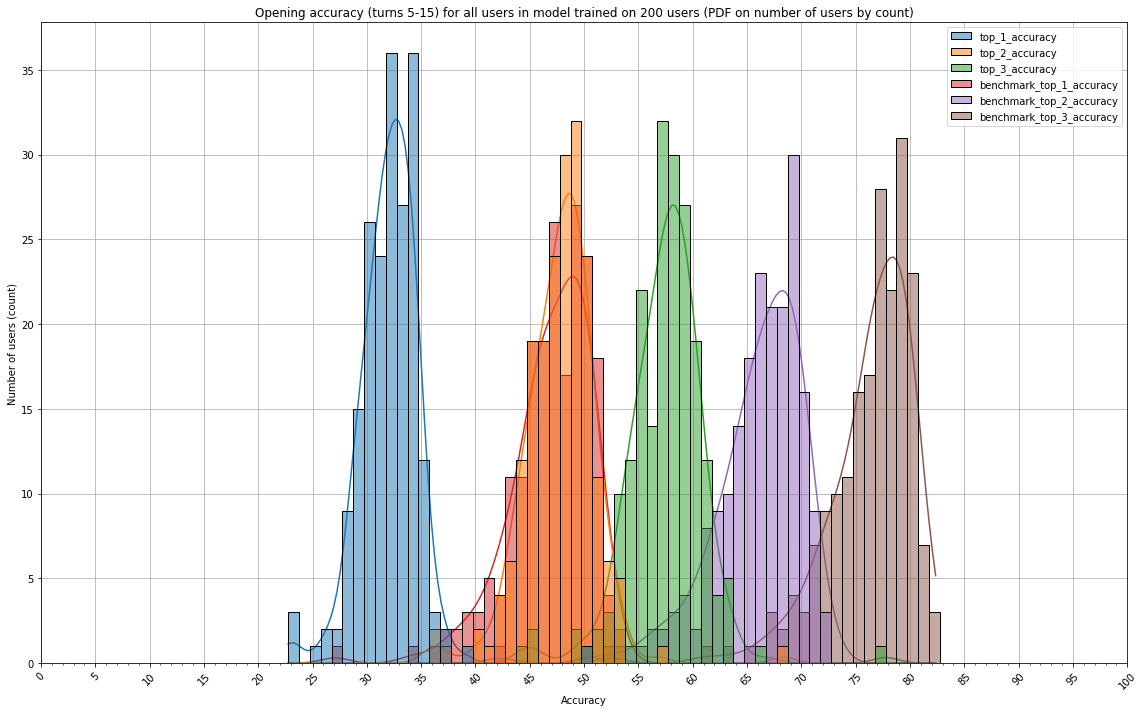

In [41]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_opening, df_opening_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat, title=(f"Opening accuracy (turns 5-{idx_separate[0]}) "
                                                    f"for all users in model trained on {len(model_stats_df)}"
                                                    f" users (PDF on number of users by {hist_stat})"))

### Middlegame accuracy

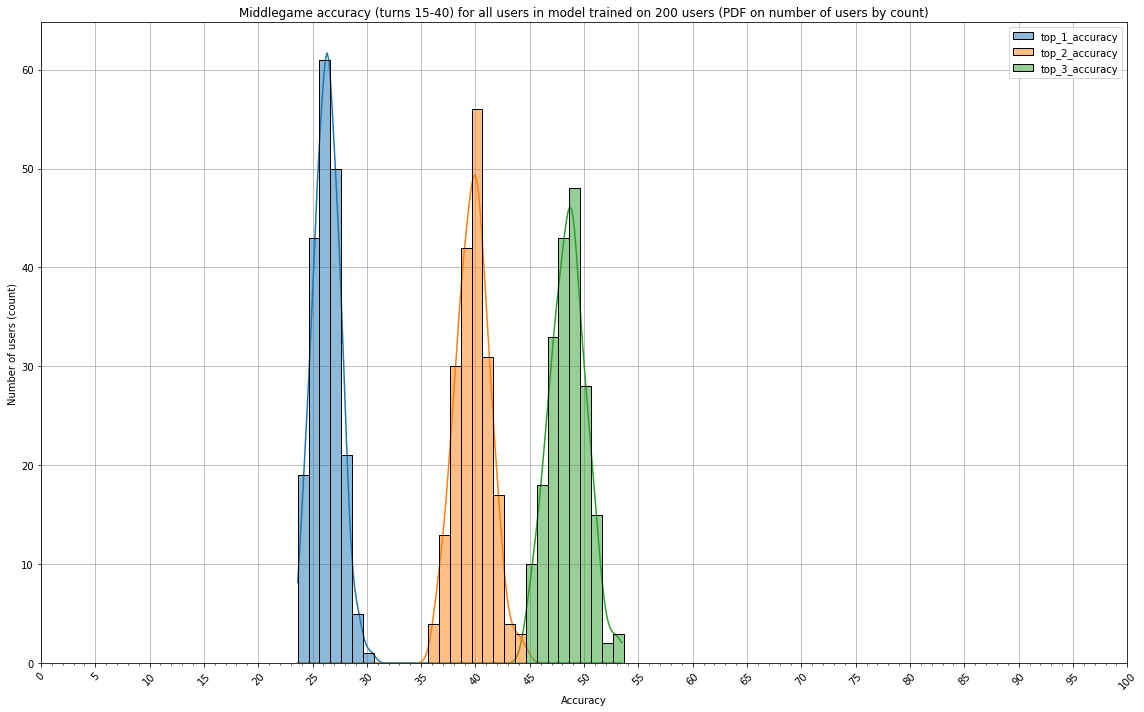

In [42]:
%matplotlib inline
plot_pdf_multiple_users(df_middle, top_k_acc, hist_stat=hist_stat,
                        title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

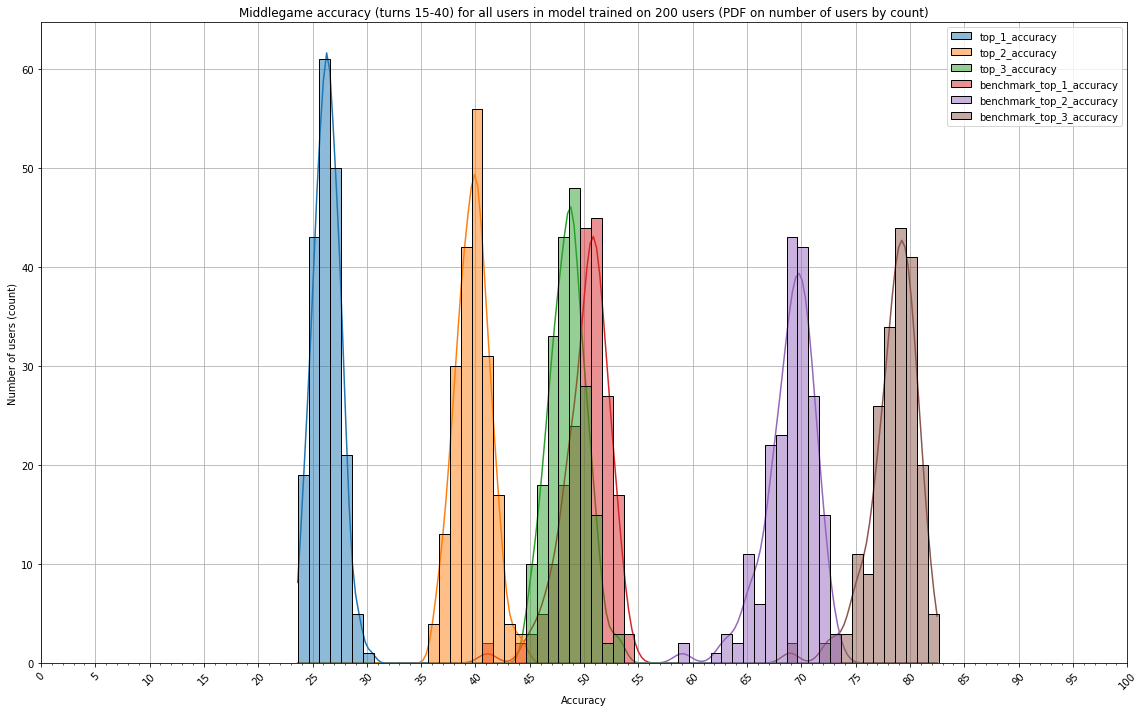

In [43]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_middle, df_middle_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat,
                        title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Endgame accuracy (Upper limit at 100 turns)

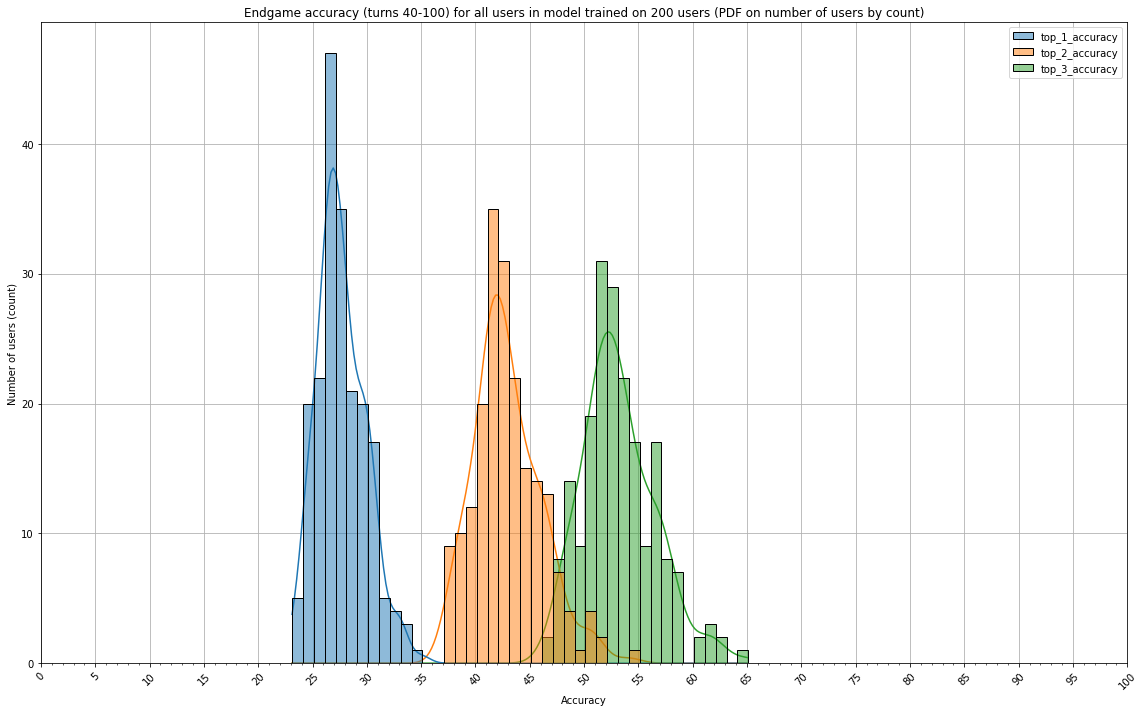

In [44]:
%matplotlib inline
plot_pdf_multiple_users(df_end, top_k_acc, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

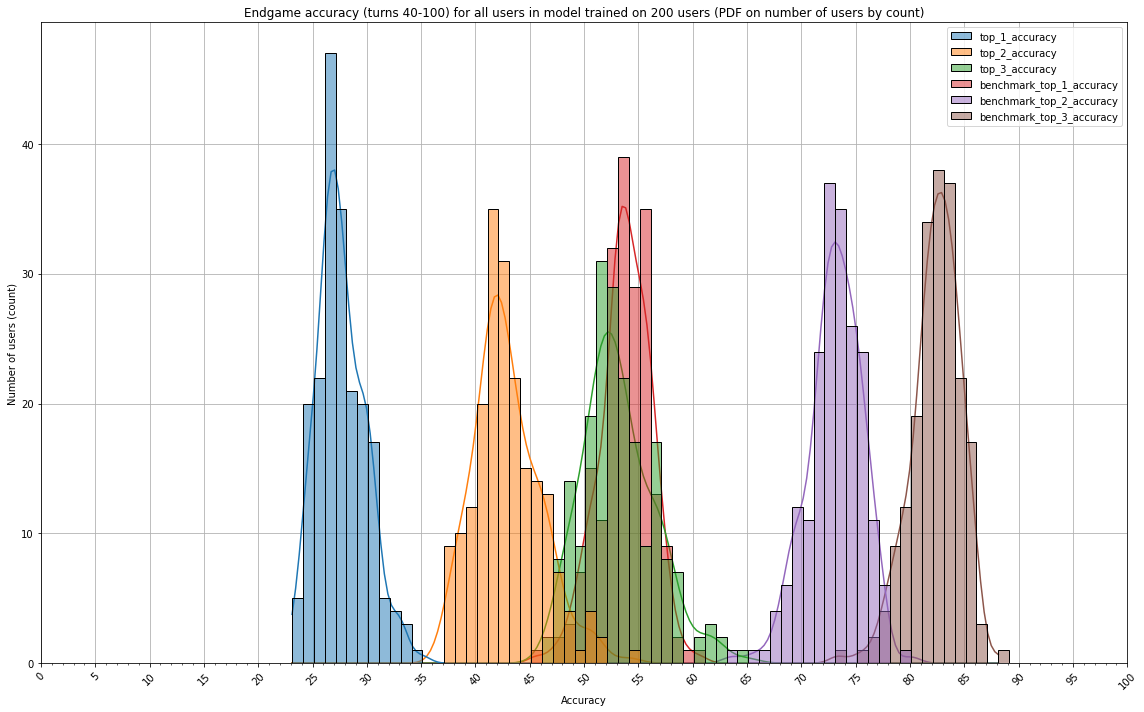

In [45]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_end, df_end_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat,
                        title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Endgame accuracy (No upper limit for turns)

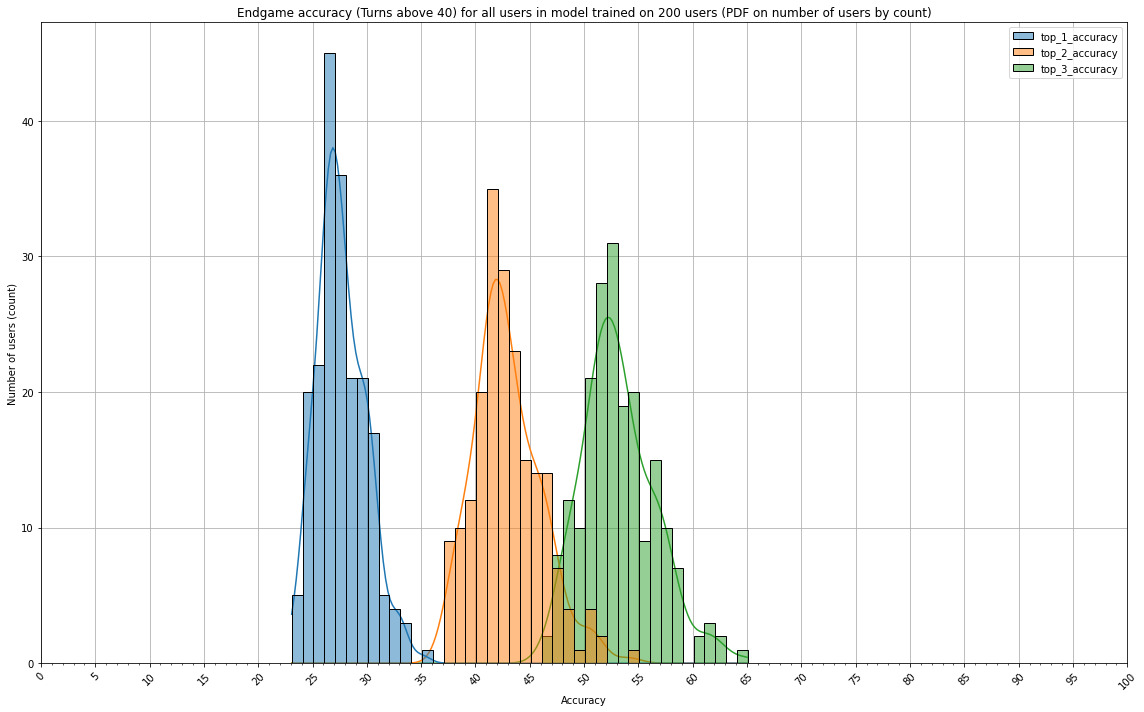

In [46]:
%matplotlib inline
plot_pdf_multiple_users(df_end_uncapped, top_k_acc, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

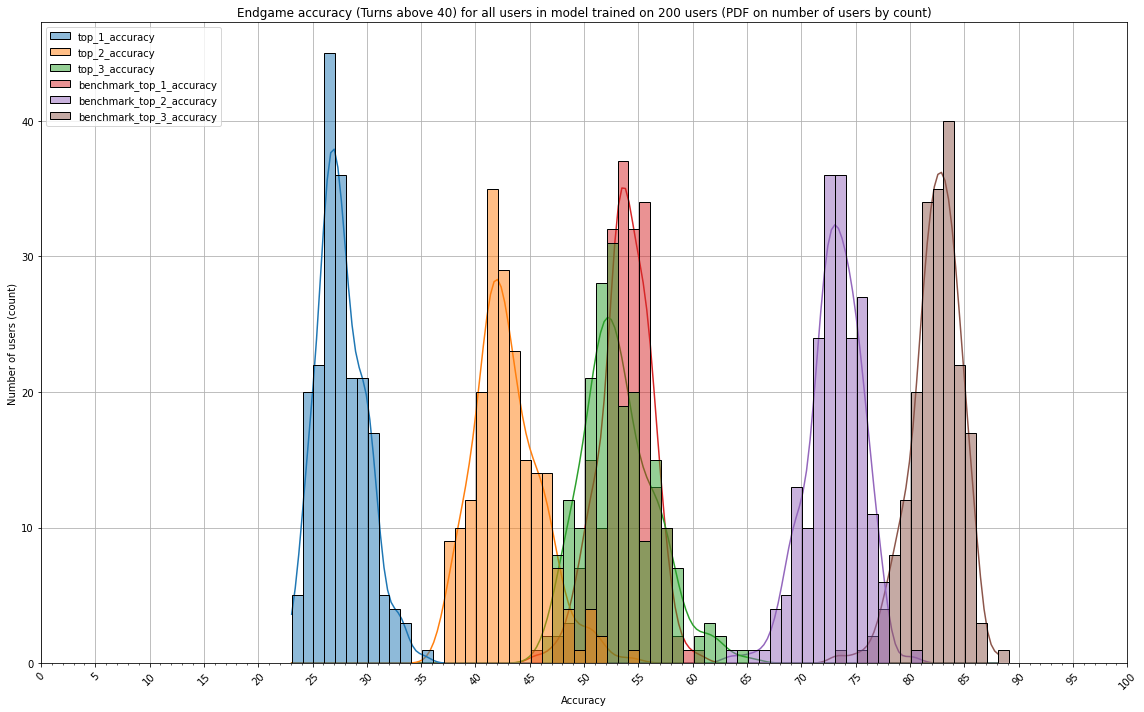

In [47]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_end_uncapped, df_end_uncapped_bench], axis=1),
                        top_k_acc + top_k_acc_bench, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Game stages comparison (Boxplot)

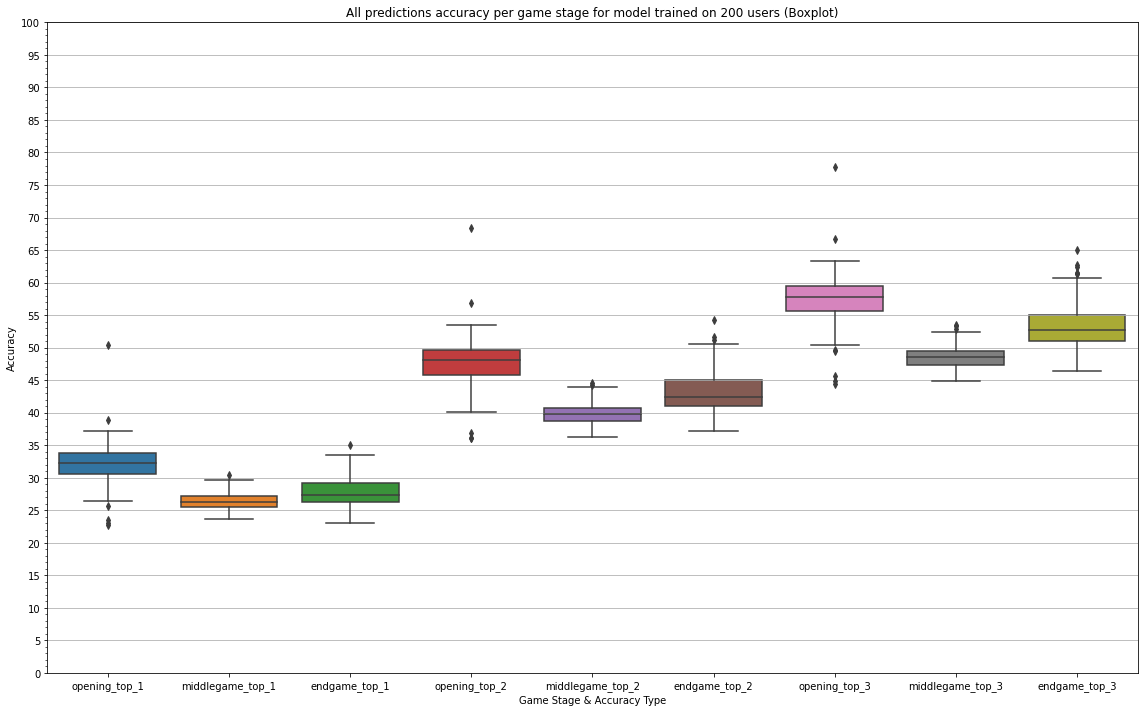

In [48]:
%matplotlib inline
boxplot_game_stages(df_opening, df_middle, df_end)

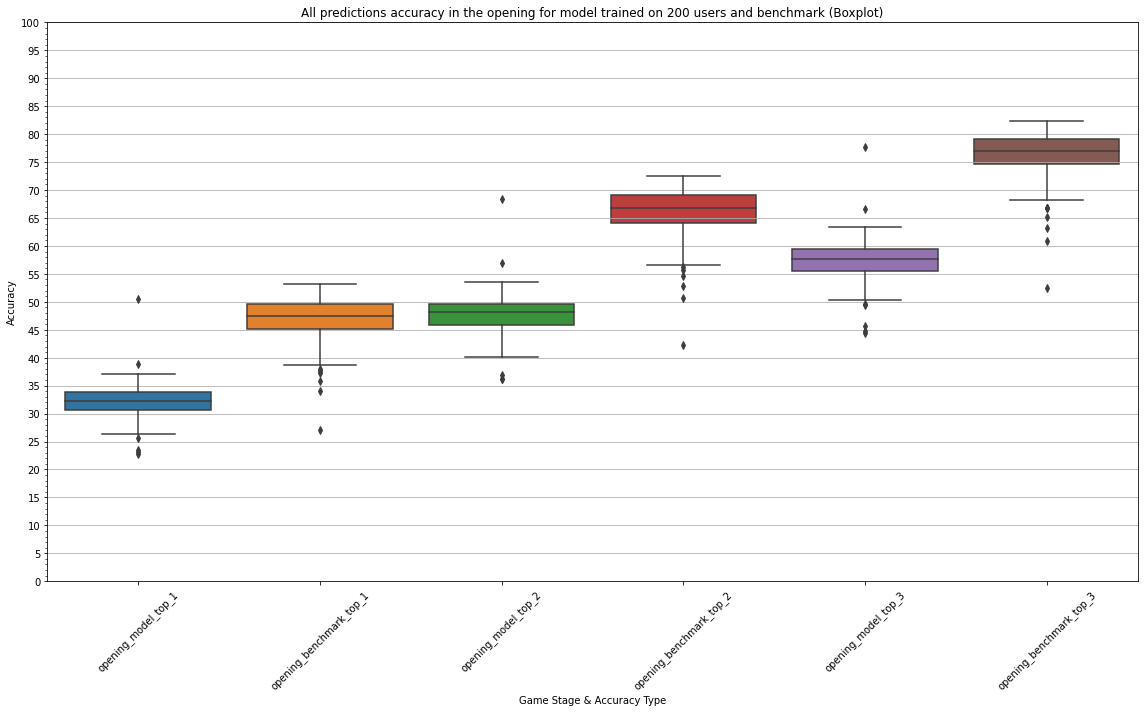

In [49]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_opening, df_opening_bench, 'opening')

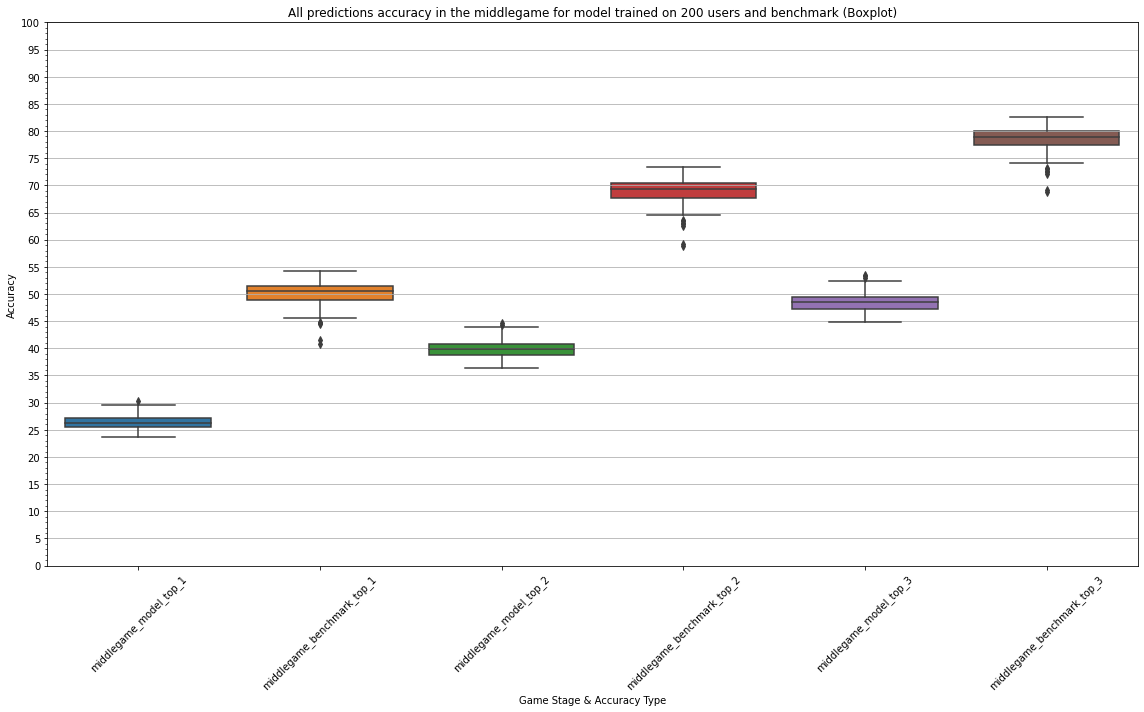

In [50]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_middle, df_middle_bench, 'middlegame')

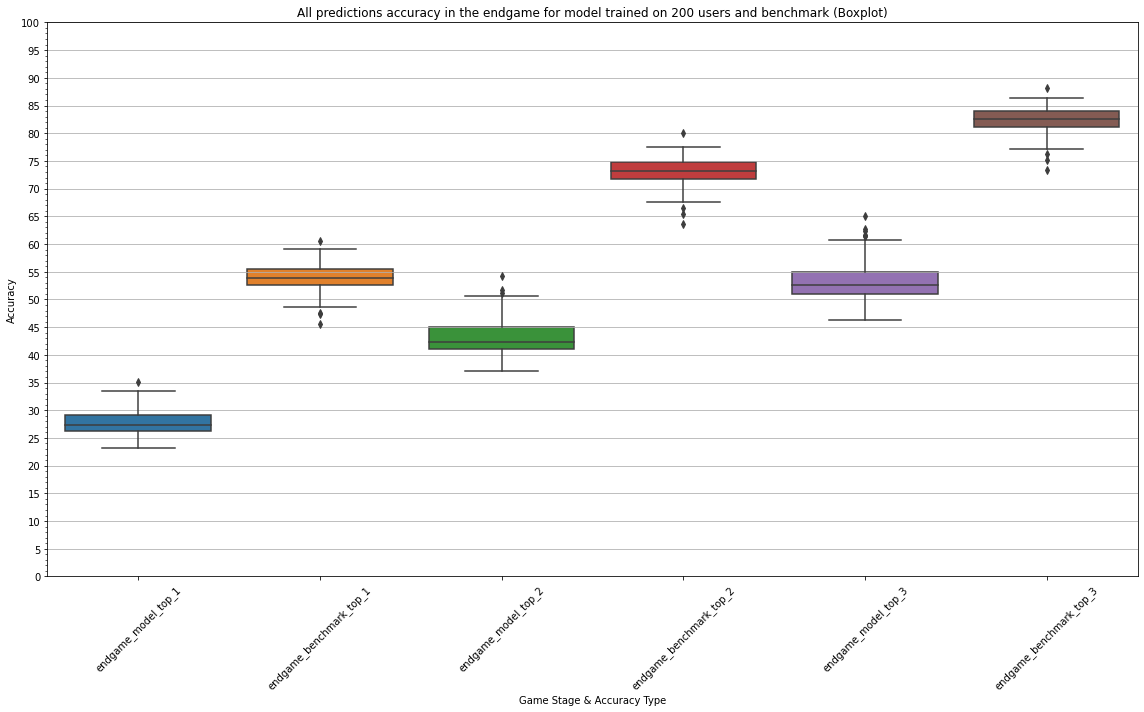

In [51]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_end, df_end_bench, 'endgame')